Loading data...
Pad sequences...
Training model...
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 100ms/step - accuracy: 0.6677 - loss: 0.5713 - val_accuracy: 0.8684 - val_loss: 0.3231
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.8746 - loss: 0.3096 - val_accuracy: 0.8746 - val_loss: 0.3016
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.9041 - loss: 0.2497 - val_accuracy: 0.8850 - val_loss: 0.2880
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.9196 - loss: 0.2158 - val_accuracy: 0.8898 - val_loss: 0.2773
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.9264 - loss: 0.1955 - val_accuracy: 0.8878 - val_loss: 0.2851
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 124ms/step - accuracy: 0.9415 - loss: 0.1639 - val_accuracy: 0.8914 - val_loss: 0.2899
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.9470 - loss: 0.1476 - val_accuracy: 0.8832 - val_loss: 0.2952
Epoch 8/15
625/625 ━━━━━━━━━━━━━

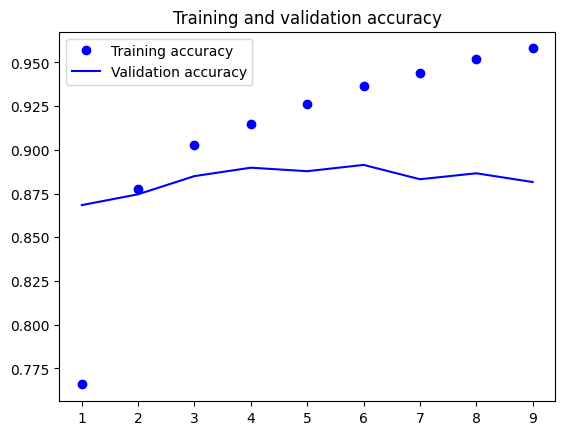

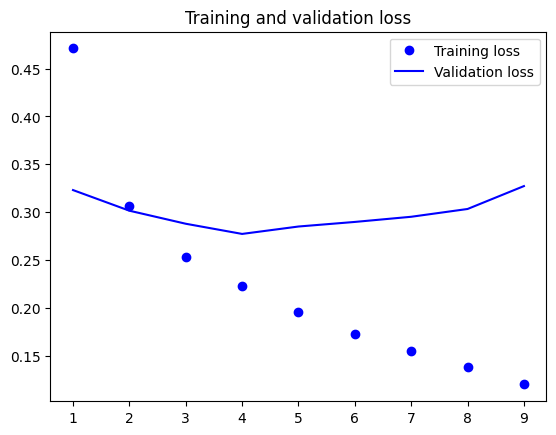

In [4]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess data
max_features = 10000
maxlen = 500

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

print('Pad sequences...')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Create Deep LSTM model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
print('Training model...')
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predictions
predictions = model.predict(X_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Print some predictions and actual values
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}")

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')  # Plot training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  # Plot validation accuracy
plt.title('Training and validation accuracy')  # Title of the plot
plt.legend()  # Show legend

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')  # Plot training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Plot validation loss
plt.title('Training and validation loss')  # Title of the plot
plt.legend()  # Show legend

plt.show()  # Display plots